In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [2]:
# import heatmap function from previous hws
def draw_heatmap_linear(acc, acc_desc, C_list, parameter):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels = C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel=parameter)
    plt.title(acc_desc + ' w.r.t '+ parameter)
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [3]:
# change column names
cols = ['Age','Workclass','fnlgwt','Education',
                'Education num','Marital Status','Occupation',
                'Relationship','Race','Sex','Capital Gain',
                'Capital Loss','Hours/Week','Native country','Income']
data = pd.read_csv('adult.csv', names = cols )

In [4]:
# check missing data and drop missing data
data.replace(' ?', np.nan, True)
data = data.dropna()

In [5]:
# find those catagorical features
catgorical_features = data.select_dtypes(include=['object']).axes[1]
catgorical_features

Index(['Workclass', 'Education', 'Marital Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native country', 'Income'],
      dtype='object')

In [6]:
# one-hot encoding
data_processed = pd.get_dummies(data, prefix_sep="_", columns=catgorical_features)
#data_processed = data_processed.sample(n = 100)

In [7]:
# get Y values
Y = data_processed['Income_ <=50K']
data_processed.drop(['Income_ <=50K'], 1, inplace = True)
data_processed.drop(['Income_ >50K'], 1, inplace = True)
data_processed.shape

(30162, 104)

In [8]:
# standarlize data
warnings.filterwarnings('ignore')
X = preprocessing.scale(data_processed)

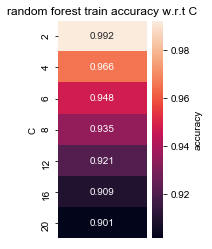

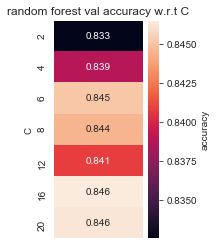

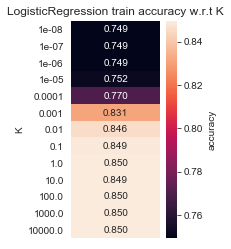

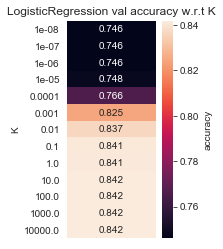

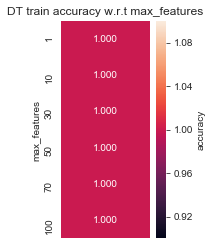

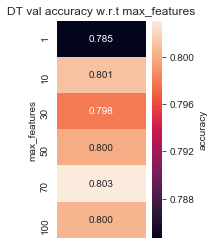

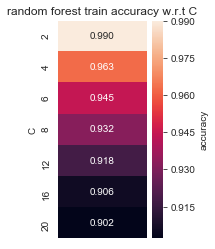

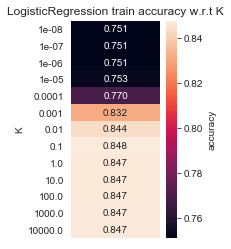

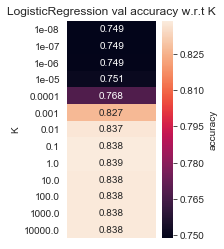

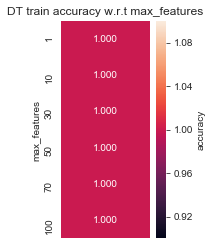

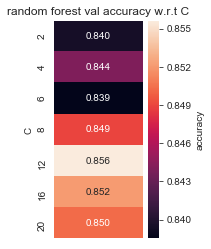

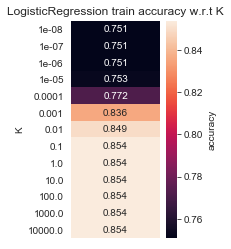

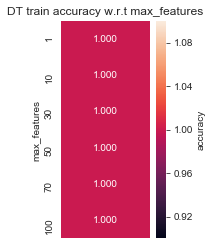

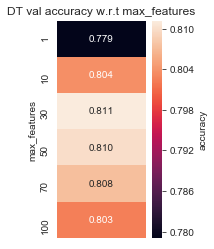

In [9]:
warnings.filterwarnings('ignore')

training_acc_rft, validation_acc_rft, testing_acc_rft = [], [], []
training_acc_logic, validation_acc_logic, testing_acc_logic = [], [], []
training_acc_dt, validation_acc_dt, testing_acc_dt = [], [], []

for i in range(3):
    # split data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = i)
    
    # Random Forest: 1,2,4,6,8,12,16 or 20.
    # train data
    split = [2,4,6,8,12,16,20]
    parameters = {'min_samples_split': split}
    rfc = RandomForestClassifier()
    # cv on the data
    clf = GridSearchCV(rfc, parameters, return_train_score= True, cv = 5)
    clf.fit(X_train, Y_train)
    train_scores = clf.cv_results_['mean_train_score']
    val_scores = clf.cv_results_['mean_test_score']
    # append trainnig validation and testing accuarcy
    training_acc_rft.append(train_scores[clf.best_index_])
    validation_acc_rft.append(val_scores[clf.best_index_])
    Y_pred = clf.predict(X_test)
    testing_acc_rft.append(accuracy_score(Y_test, Y_pred))
    # draw heatmap
    draw_heatmap_linear(train_scores.reshape(-1,1), "random forest train accuracy", split,'C')
    draw_heatmap_linear(val_scores.reshape(-1,1), "random forest val accuracy",split,'C')
    
    
    # LogisticRegression   parameter by factors of 10 from 10−8 to 10^4
    C_list = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
    parameters = {'C': C_list}
    logist = LogisticRegression()
    # cv on the data
    clf = GridSearchCV(logist, parameters, return_train_score= True, cv = 5)
    clf.fit(X_train, Y_train)
    train_scores = clf.cv_results_['mean_train_score']
    val_scores = clf.cv_results_['mean_test_score']
    # append trainnig validation and testing accuarcy
    training_acc_logic.append(train_scores[clf.best_index_])
    validation_acc_logic.append(val_scores[clf.best_index_])
    Y_pred = clf.predict(X_test)
    testing_acc_logic.append(accuracy_score(Y_test, Y_pred))
    # draw heatmap
    draw_heatmap_linear(train_scores.reshape(-1,1), "LogisticRegression train accuracy", C_list, "K")
    draw_heatmap_linear(val_scores.reshape(-1,1), "LogisticRegression val accuracy", C_list, "K")
    
    # decision tree part
    max_features_List = [1, 10, 30, 50, 70, 100]
    parameters = {'max_features': max_features_List}
    dt = DecisionTreeClassifier()
    # cv on the data
    clf = GridSearchCV(dt, parameters, return_train_score= True, cv = 5)
    clf.fit(X_train, Y_train)
    train_scores = clf.cv_results_['mean_train_score']
    val_scores = clf.cv_results_['mean_test_score']
    # append trainnig validation and testing accuarcy
    training_acc_dt.append(train_scores[clf.best_index_])
    validation_acc_dt.append(val_scores[clf.best_index_])
    Y_pred = clf.predict(X_test)
    testing_acc_dt.append(accuracy_score(Y_test, Y_pred))
    # draw heatmap
    draw_heatmap_linear(train_scores.reshape(-1,1), "DT train accuracy", max_features_List, "max_features")
    draw_heatmap_linear(val_scores.reshape(-1,1), "DT val accuracy", max_features_List, "max_features")

In [10]:
print("Mean train acc for random forest is " + str(np.mean(training_acc_rft)))
print("Mean validation acc for random forest is " + str(np.mean(validation_acc_rft)))
print("Mean test acc for random forest is " + str(np.mean(testing_acc_rft)))
print("Mean train acc for LogisticRegression is " + str(np.mean(training_acc_logic)))
print("Mean validation acc for LogisticRegression is " + str(np.mean(validation_acc_logic)))
print("Mean test acc for LogisticRegression is " + str(np.mean(testing_acc_logic)))
print("Mean train acc for decision tree is " + str(np.mean(training_acc_dt)))
print("Mean validation acc for decision tree is " + str(np.mean(validation_acc_dt)))
print("Mean test acc for decision tree is " + str(np.mean(testing_acc_dt)))

Mean train acc for random forest is 0.9103669386176296
Mean validation acc for random forest is 0.8496905393457118
Mean test acc for random forest is 0.8496615554634618
Mean train acc for LogisticRegression is 0.8500360127470804
Mean validation acc for LogisticRegression is 0.841788240495137
Mean test acc for LogisticRegression is 0.8446746788230418
Mean train acc for decision tree is 1.0
Mean validation acc for decision tree is 0.8050950486295313
Mean test acc for decision tree is 0.8052079016438735


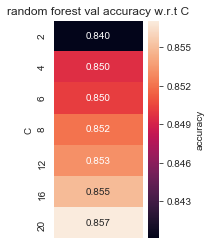

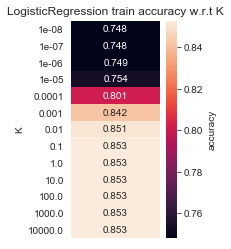

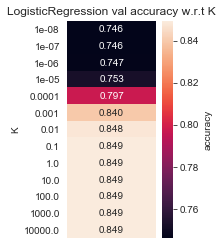

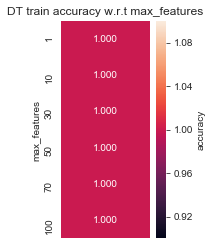

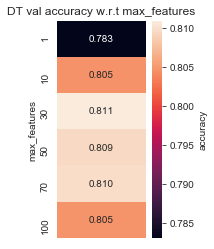

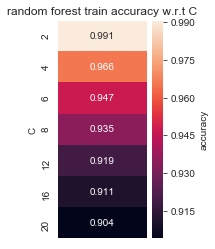

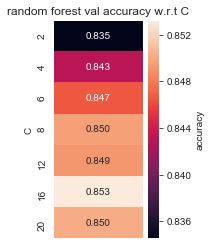

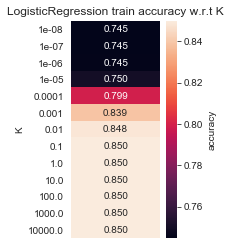

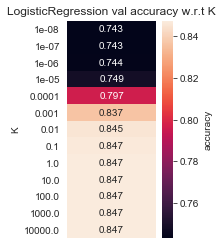

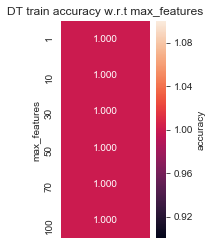

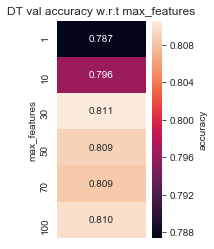

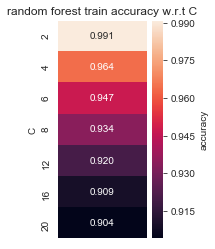

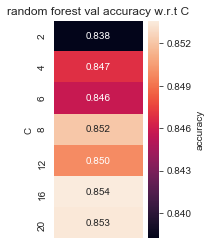

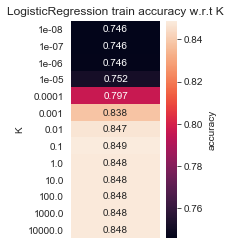

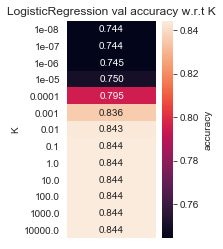

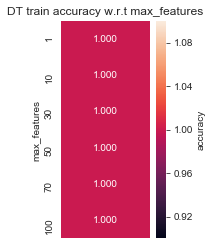

In [11]:
warnings.filterwarnings('ignore')

training_acc_rft, validation_acc_rft, testing_acc_rft = [], [], []
training_acc_logic, validation_acc_logic, testing_acc_logic = [], [], []
training_acc_dt, validation_acc_dt, testing_acc_dt = [], [], []

for i in range(3):
    # split data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = i)
    
    # Random Forest: 1,2,4,6,8,12,16 or 20.
    # train data
    split = [2,4,6,8,12,16,20]
    parameters = {'min_samples_split': split}
    rfc = RandomForestClassifier()
    # cv on the data
    clf = GridSearchCV(rfc, parameters, return_train_score= True, cv = 5)
    clf.fit(X_train, Y_train)
    train_scores = clf.cv_results_['mean_train_score']
    val_scores = clf.cv_results_['mean_test_score']
    # append trainnig validation and testing accuarcy
    training_acc_rft.append(train_scores[clf.best_index_])
    validation_acc_rft.append(val_scores[clf.best_index_])
    Y_pred = clf.predict(X_test)
    testing_acc_rft.append(accuracy_score(Y_test, Y_pred))
    # draw heatmap
    draw_heatmap_linear(train_scores.reshape(-1,1), "random forest train accuracy", split,'C')
    draw_heatmap_linear(val_scores.reshape(-1,1), "random forest val accuracy",split,'C')
    
    
    # LogisticRegression   parameter by factors of 10 from 10−8 to 10^4
    C_list = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
    parameters = {'C': C_list}
    logist = LogisticRegression()
    # cv on the data
    clf = GridSearchCV(logist, parameters, return_train_score= True, cv = 5)
    clf.fit(X_train, Y_train)
    train_scores = clf.cv_results_['mean_train_score']
    val_scores = clf.cv_results_['mean_test_score']
    # append trainnig validation and testing accuarcy
    training_acc_logic.append(train_scores[clf.best_index_])
    validation_acc_logic.append(val_scores[clf.best_index_])
    Y_pred = clf.predict(X_test)
    testing_acc_logic.append(accuracy_score(Y_test, Y_pred))
    # draw heatmap
    draw_heatmap_linear(train_scores.reshape(-1,1), "LogisticRegression train accuracy", C_list, "K")
    draw_heatmap_linear(val_scores.reshape(-1,1), "LogisticRegression val accuracy", C_list, "K")
    
    # decision tree part
    max_features_List = [1, 10, 30, 50, 70, 100]
    parameters = {'max_features': max_features_List}
    dt = DecisionTreeClassifier()
    # cv on the data
    clf = GridSearchCV(dt, parameters, return_train_score= True, cv = 5)
    clf.fit(X_train, Y_train)
    train_scores = clf.cv_results_['mean_train_score']
    val_scores = clf.cv_results_['mean_test_score']
    # append trainnig validation and testing accuarcy
    training_acc_dt.append(train_scores[clf.best_index_])
    validation_acc_dt.append(val_scores[clf.best_index_])
    Y_pred = clf.predict(X_test)
    testing_acc_dt.append(accuracy_score(Y_test, Y_pred))
    # draw heatmap
    draw_heatmap_linear(train_scores.reshape(-1,1), "DT train accuracy", max_features_List, "max_features")
    draw_heatmap_linear(val_scores.reshape(-1,1), "DT val accuracy", max_features_List, "max_features")

In [12]:
print("Mean train acc for random forest is " + str(np.mean(training_acc_rft)))
print("Mean validation acc for random forest is " + str(np.mean(validation_acc_rft)))
print("Mean test acc for random forest is " + str(np.mean(testing_acc_rft)))
print("Mean train acc for LogisticRegression is " + str(np.mean(training_acc_logic)))
print("Mean validation acc for LogisticRegression is " + str(np.mean(validation_acc_logic)))
print("Mean test acc for LogisticRegression is " + str(np.mean(testing_acc_logic)))
print("Mean train acc for decision tree is " + str(np.mean(training_acc_dt)))
print("Mean validation acc for decision tree is " + str(np.mean(validation_acc_dt)))
print("Mean test acc for decision tree is " + str(np.mean(testing_acc_dt)))

Mean train acc for random forest is 0.9081736565314221
Mean validation acc for random forest is 0.8546073425723316
Mean test acc for random forest is 0.8533032734345646
Mean train acc for LogisticRegression is 0.8504022851567147
Mean validation acc for LogisticRegression is 0.846959750679663
Mean test acc for LogisticRegression is 0.8474902194814669
Mean train acc for decision tree is 0.9999834226666392
Mean validation acc for decision tree is 0.8104237119554406
Mean test acc for decision tree is 0.8086333797493536


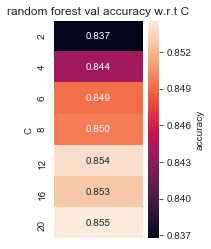

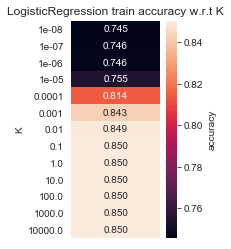

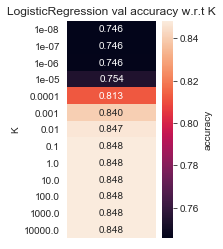

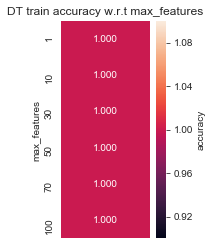

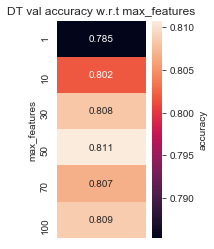

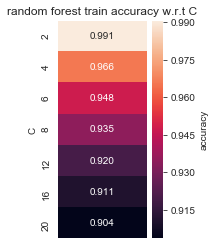

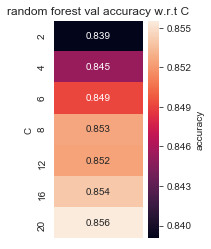

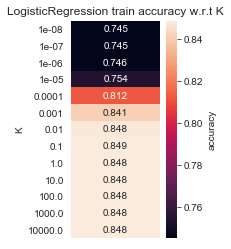

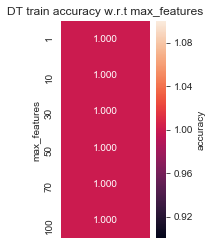

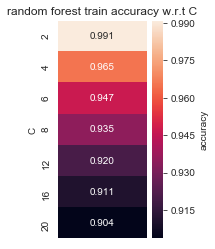

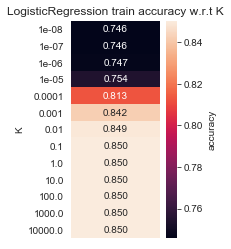

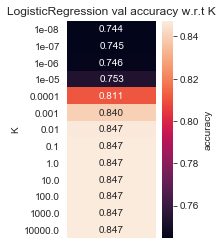

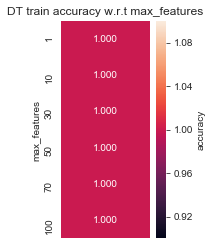

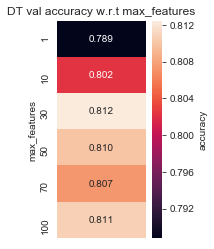

In [13]:
warnings.filterwarnings('ignore')

training_acc_rft, validation_acc_rft, testing_acc_rft = [], [], []
training_acc_logic, validation_acc_logic, testing_acc_logic = [], [], []
training_acc_dt, validation_acc_dt, testing_acc_dt = [], [], []

for i in range(3):
    # split data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = i)
    
    # Random Forest: 1,2,4,6,8,12,16 or 20.
    # train data
    split = [2,4,6,8,12,16,20]
    parameters = {'min_samples_split': split}
    rfc = RandomForestClassifier()
    # cv on the data
    clf = GridSearchCV(rfc, parameters, return_train_score= True, cv = 5)
    clf.fit(X_train, Y_train)
    train_scores = clf.cv_results_['mean_train_score']
    val_scores = clf.cv_results_['mean_test_score']
    # append trainnig validation and testing accuarcy
    training_acc_rft.append(train_scores[clf.best_index_])
    validation_acc_rft.append(val_scores[clf.best_index_])
    Y_pred = clf.predict(X_test)
    testing_acc_rft.append(accuracy_score(Y_test, Y_pred))
    # draw heatmap
    draw_heatmap_linear(train_scores.reshape(-1,1), "random forest train accuracy", split,'C')
    draw_heatmap_linear(val_scores.reshape(-1,1), "random forest val accuracy",split,'C')
    
    
    # LogisticRegression   parameter by factors of 10 from 10−8 to 10^4
    C_list = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
    parameters = {'C': C_list}
    logist = LogisticRegression()
    # cv on the data
    clf = GridSearchCV(logist, parameters, return_train_score= True, cv = 5)
    clf.fit(X_train, Y_train)
    train_scores = clf.cv_results_['mean_train_score']
    val_scores = clf.cv_results_['mean_test_score']
    # append trainnig validation and testing accuarcy
    training_acc_logic.append(train_scores[clf.best_index_])
    validation_acc_logic.append(val_scores[clf.best_index_])
    Y_pred = clf.predict(X_test)
    testing_acc_logic.append(accuracy_score(Y_test, Y_pred))
    # draw heatmap
    draw_heatmap_linear(train_scores.reshape(-1,1), "LogisticRegression train accuracy", C_list, "K")
    draw_heatmap_linear(val_scores.reshape(-1,1), "LogisticRegression val accuracy", C_list, "K")
    
    # decision tree part
    max_features_List = [1, 10, 30, 50, 70, 100]
    parameters = {'max_features': max_features_List}
    dt = DecisionTreeClassifier()
    # cv on the data
    clf = GridSearchCV(dt, parameters, return_train_score= True, cv = 5)
    clf.fit(X_train, Y_train)
    train_scores = clf.cv_results_['mean_train_score']
    val_scores = clf.cv_results_['mean_test_score']
    # append trainnig validation and testing accuarcy
    training_acc_dt.append(train_scores[clf.best_index_])
    validation_acc_dt.append(val_scores[clf.best_index_])
    Y_pred = clf.predict(X_test)
    testing_acc_dt.append(accuracy_score(Y_test, Y_pred))
    # draw heatmap
    draw_heatmap_linear(train_scores.reshape(-1,1), "DT train accuracy", max_features_List, "max_features")
    draw_heatmap_linear(val_scores.reshape(-1,1), "DT val accuracy", max_features_List, "max_features")

In [14]:
print("Mean train acc for random forest is " + str(np.mean(training_acc_rft)))
print("Mean validation acc for random forest is " + str(np.mean(validation_acc_rft)))
print("Mean test acc for random forest is " + str(np.mean(testing_acc_rft)))
print("Mean train acc for LogisticRegression is " + str(np.mean(training_acc_logic)))
print("Mean validation acc for LogisticRegression is " + str(np.mean(validation_acc_logic)))
print("Mean test acc for LogisticRegression is " + str(np.mean(testing_acc_logic)))
print("Mean train acc for decision tree is " + str(np.mean(training_acc_dt)))
print("Mean validation acc for decision tree is " + str(np.mean(validation_acc_dt)))
print("Mean test acc for decision tree is " + str(np.mean(testing_acc_dt)))

Mean train acc for random forest is 0.9088890146614089
Mean validation acc for random forest is 0.8546976667081106
Mean test acc for random forest is 0.8532515608597161
Mean train acc for LogisticRegression is 0.8497105941696614
Mean validation acc for LogisticRegression is 0.8475140563913409
Mean test acc for LogisticRegression is 0.8469528703243273
Mean train acc for decision tree is 0.9999689169275472
Mean validation acc for decision tree is 0.8120933316755772
Mean test acc for decision tree is 0.8105420188960717
